In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# eCommerce Dataset
!wget https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/Datasets/shopping_data.csv

shopping_df = pd.read_csv('shopping_data.csv')

--2024-09-04 17:03:55--  https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/Datasets/shopping_data.csv
Resolving nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com (nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com)... 52.219.160.34, 52.219.66.76, 3.5.210.15, ...
Connecting to nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com (nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com)|52.219.160.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16203132 (15M) [text/csv]
Saving to: ‘shopping_data.csv’

shopping_data.csv   100%[===================>]  15.45M  4.69MB/s    in 3.3s    

2024-09-04 17:03:59 (4.69 MB/s) - ‘shopping_data.csv’ saved [16203132/16203132]



In [3]:
shopping_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
shopping_df.isna().sum()

,0
Order ID,548
Product,548
Quantity Ordered,548
Price Each,548
Order Date,548
Purchase Address,548


In [5]:
shopping_df.drop_duplicates(inplace=True)
shopping_df.dropna(how='all',inplace=True)

In [6]:
shopping_df.isna().sum()

,0
Order ID,0
Product,0
Quantity Ordered,0
Price Each,0
Order Date,0
Purchase Address,0


In [7]:
shopping_df.dtypes

,0
Order ID,float64
Product,object
Quantity Ordered,float64
Price Each,float64
Order Date,object
Purchase Address,object


In [8]:
shopping_df['Quantity Ordered']=shopping_df['Quantity Ordered'].astype(int)

In [9]:
shopping_df['Order Date']=pd.to_datetime(shopping_df['Order Date'])

<ipython-input-9-c35acaa253e4>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  shopping_df['Order Date']=pd.to_datetime(shopping_df['Order Date'])


In [10]:
shopping_df.dtypes

,0
Order ID,float64
Product,object
Quantity Ordered,int64
Price Each,float64
Order Date,datetime64[ns]
Purchase Address,object


#**Question 1:**
**What is the best time to display advertisements to maximize the likelihood of customers' buying products?**

##Analysis:
* Find the total number of orders made each hour.
* Find the hour with the highest number of orders.

In [11]:
hour=shopping_df.groupby(shopping_df['Order Date'].dt.hour)
hour_df=hour['Order ID'].count()
hour_df=hour_df.reset_index()
hour_df.index.name='Index'
hour_df.rename(columns={'Order Date':"Order Hour",'Order ID':'Orders'},inplace=True)
hour_df


,Order Hour,Orders
Index,,
0,0,3902
1,1,2347
2,2,1242
3,3,830
4,4,852
5,5,1320
6,6,2481
7,7,4002
8,8,6252


In [12]:
hour_df.sort_values(by='Orders',ascending=False).head(1)

,Order Hour,Orders
Index,,
19,19,12886


 ## Plotting:

* Plot a line graph between hours and the number of orders to get a visual understanding of what the best time to display advertisements is.

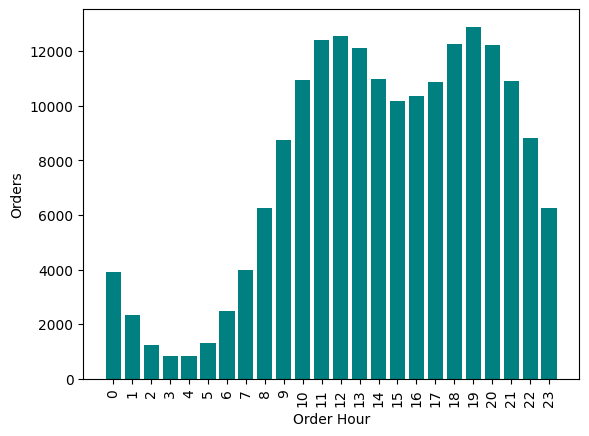

In [13]:
plt.bar(hour_df['Order Hour'],hour_df['Orders'],color='teal')
plt.xticks(hour_df['Order Hour'],color='black',rotation='vertical')
plt.xlabel('Order Hour',color='black')
plt.ylabel('Orders')
plt.show()

#**Question 2:**

**Which product has the highest sales(based on quantity)? Why do you think it has the highest sales?**

##Analysis:
* Find the total quantity ordered for each product.
* Find the product with the highest sales.


In [14]:
pop_prod=shopping_df.groupby('Product')
pop_prod_df=pop_prod['Quantity Ordered'].sum()
pop_prod_df

,Quantity Ordered
Product,
20in Monitor,4126
27in 4K Gaming Monitor,6239
27in FHD Monitor,7541
34in Ultrawide Monitor,6192
AA Batteries (4-pack),27615
AAA Batteries (4-pack),30986
Apple Airpods Headphones,15637
Bose SoundSport Headphones,13430
Flatscreen TV,4813


In [15]:
# YOUR CODE HERE
pop_prod=shopping_df.groupby('Product')
pop_prod_df=pop_prod['Quantity Ordered'].sum()
pop_prod_df=pop_prod_df.reset_index()
pop_prod_prices=shopping_df.groupby('Product')['Price Each'].first().reset_index()
pop_prod_df=pop_prod_df.merge(pop_prod_prices,on='Product')
pop_prod_df

,Product,Quantity Ordered,Price Each
0,20in Monitor,4126,109.99
1,27in 4K Gaming Monitor,6239,389.99
2,27in FHD Monitor,7541,149.99
3,34in Ultrawide Monitor,6192,379.99
4,AA Batteries (4-pack),27615,3.84
5,AAA Batteries (4-pack),30986,2.99
6,Apple Airpods Headphones,15637,150.00
7,Bose SoundSport Headphones,13430,99.99
8,Flatscreen TV,4813,300.00
9,Google Phone,5529,600.00


In [16]:
pop_prod_df['Product Sales']=pop_prod_df['Price Each']*pop_prod_df['Quantity Ordered']
print('Product with highest sales is ',pop_prod_df['Product'][pop_prod_df['Product Sales'].idxmax()]
      ,'with sales of ',pop_prod_df['Product Sales'].max(),'rupees.')

Product with highest sales is  Macbook Pro Laptop with sales of  8032500.0 rupees.


## Plotting:
* Plot a bar graph(GRAPH-1) between the total quantity ordered and products to get a visual understanding of which product is sold the most.
* Plot a graph(GRAPH-2) with the products on the x-axis and the total quantity ordered and average price of each product on the y-axis to understand if a product's price is related to the quantity sold.

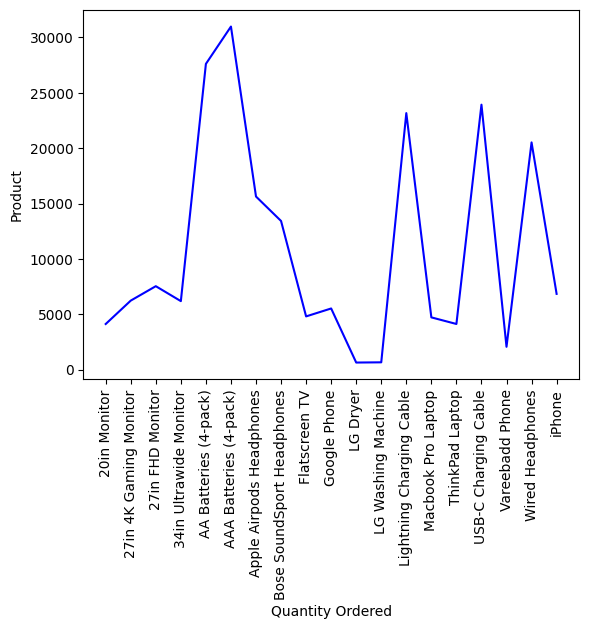

In [17]:
# WRITE YOUR CODE HERE FOR GRAPH-1
plt.plot(pop_prod_df['Product'],pop_prod_df['Quantity Ordered'],color='blue')
plt.xticks(rotation='vertical')
plt.xlabel('Quantity Ordered')
plt.ylabel('Product')
plt.show()

<ipython-input-18-ea8d896e33ba>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(pop_prod_df['Product'], rotation='vertical')


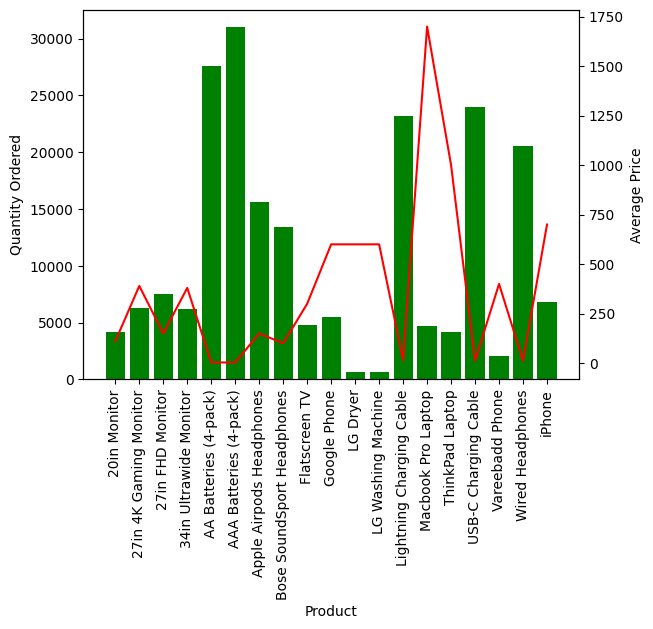

In [18]:
# WRITE YOUR CODE HERE FOR GRAPH-2
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(pop_prod_df['Product'],pop_prod_df['Quantity Ordered'],color='green')
ax2.plot(pop_prod_df['Product'],shopping_df.groupby('Product')['Price Each'].mean(),color='red')
ax1.set_xticklabels(pop_prod_df['Product'], rotation='vertical')
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered')
ax2.set_ylabel('Average Price')
plt.show()

# **Question 3**


**Find the products with the highest popularity in each month of the year 2019.**


##Analysis:
* Find the total quantity ordered for each product in each month.
* Find the product with the maximum quantity ordered for each month.

In [19]:
shopping_df['Month']=shopping_df['Order Date'].dt.month
shopping_df['Year']=shopping_df['Order Date'].dt.year
year_grp=shopping_df.groupby('Year')
year_2019_grp=year_grp.get_group(2019)
new_year=shopping_df[shopping_df['Year']==2019]
new_year

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year
0,176558.0,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,2019
2,176559.0,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,2019
3,176560.0,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019
6,176560.0,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019
7,176561.0,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,2019
...,...,...,...,...,...,...,...,...
186493,176554.0,Lightning Charging Cable,1,14.95,2019-03-24 11:14:00,"672 12th St, San Francisco, CA 94016",3,2019
186494,176555.0,27in FHD Monitor,1,149.99,2019-03-22 20:27:00,"42 4th St, San Francisco, CA 94016",3,2019
186495,176556.0,AAA Batteries (4-pack),3,2.99,2019-03-14 10:29:00,"871 7th St, Los Angeles, CA 90001",3,2019
186496,176557.0,iPhone,1,700.00,2019-03-30 12:32:00,"83 Washington St, San Francisco, CA 94016",3,2019


In [20]:
new_year_df=new_year.groupby(['Month','Product'])['Quantity Ordered'].sum()
new_year_df=new_year_df.reset_index()
index=new_year_df.groupby('Month')['Quantity Ordered'].idxmax()
new_year_df.loc[index]

,Month,Product,Quantity Ordered
5,1,AAA Batteries (4-pack),1595
24,2,AAA Batteries (4-pack),1971
43,3,AAA Batteries (4-pack),2477
62,4,AAA Batteries (4-pack),2936
81,5,AAA Batteries (4-pack),2923
100,6,AAA Batteries (4-pack),2161
119,7,AAA Batteries (4-pack),2361
138,8,AAA Batteries (4-pack),2019
157,9,AAA Batteries (4-pack),1922
176,10,AAA Batteries (4-pack),3357


#**Question 4:**
**What was the best month for sales? How much was earned that month?**

##Analysis:
* Add a `Sales` column that contains the total cost of an order.
* Find the month which has the highest sales and print the sales along with the name of the month.


In [21]:
shopping_df['Sales']=shopping_df['Quantity Ordered']*shopping_df['Price Each']
shopping_df['Month']=shopping_df['Order Date'].dt.month
shopping_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Sales
0,176558.0,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,2019,23.90
2,176559.0,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,2019,99.99
3,176560.0,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,600.00
6,176560.0,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,11.99
7,176561.0,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,2019,11.99
...,...,...,...,...,...,...,...,...,...
186493,176554.0,Lightning Charging Cable,1,14.95,2019-03-24 11:14:00,"672 12th St, San Francisco, CA 94016",3,2019,14.95
186494,176555.0,27in FHD Monitor,1,149.99,2019-03-22 20:27:00,"42 4th St, San Francisco, CA 94016",3,2019,149.99
186495,176556.0,AAA Batteries (4-pack),3,2.99,2019-03-14 10:29:00,"871 7th St, Los Angeles, CA 90001",3,2019,8.97
186496,176557.0,iPhone,1,700.00,2019-03-30 12:32:00,"83 Washington St, San Francisco, CA 94016",3,2019,700.00


In [22]:
best_month=shopping_df.groupby('Month')

In [23]:
best_month_sales=best_month['Sales'].sum()

In [24]:
best_month_sales.sort_values(ascending=False).head(1)

,Sales
Month,
12,4608295.7


In [25]:
shopping_df['Month_Name']=shopping_df['Order Date'].dt.month_name()
best_month=shopping_df.groupby('Month_Name')['Sales'].sum()

In [26]:
best_month_df = best_month.reset_index()
best_month_df['Month_num']=shopping_df['Order Date'].dt.month
best_month_df.sort_values('Month_num',inplace=True)
#best_month_df.drop(12,inplace=True)
best_month_df.drop('Month_num',axis=1,inplace=True)
print(best_month_df)

   Month_Name       Sales
0       April  3389217.98
2    December  4608295.70
3    February  2200078.08
6        June  2576280.15
7       March  2804973.35
9    November  3197875.05
10    October  3734777.86
11  September  2094465.69
1      August  2241083.37
4     January  1821413.16
5        July  2646461.32
8         May  3150616.23


In [27]:
best_month_df['Month_Num']=best_month_df['Month_Name'].map({'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12})

In [28]:
best_month_df.sort_values('Month_Num',inplace=True,ignore_index=True)
best_month_df

,Month_Name,Sales,Month_Num
0,January,1821413.16,1
1,February,2200078.08,2
2,March,2804973.35,3
3,April,3389217.98,4
4,May,3150616.23,5
5,June,2576280.15,6
6,July,2646461.32,7
7,August,2241083.37,8
8,September,2094465.69,9
9,October,3734777.86,10


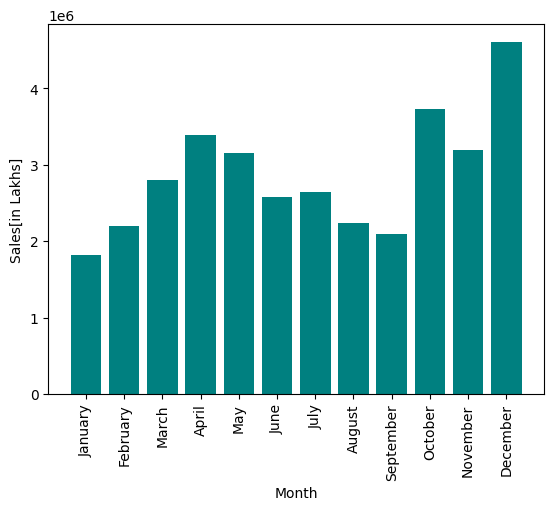

In [29]:
plt.bar(best_month_df['Month_Name'],best_month_df['Sales'],color='teal')
plt.xticks(rotation='vertical')
plt.xlabel('Month')
plt.ylabel('Sales[in Lakhs]')
plt.show()

In [30]:
best_month_df.nlargest(1,'Sales')

,Month_Name,Sales,Month_Num
11,December,4608295.7,12


#**Question 5**:

**Which city had the highest number of sales?**

##Analysis:
* Find the total number of sales in each city.
* Find the city which has the maximum number of sales.


In [31]:
city=shopping_df['Purchase Address'].str.split(',',expand=True)
city

,0,1,2
0,917 1st St,Dallas,TX 75001
2,682 Chestnut St,Boston,MA 02215
3,669 Spruce St,Los Angeles,CA 90001
6,669 Spruce St,Los Angeles,CA 90001
7,333 8th St,Los Angeles,CA 90001
...,...,...,...
186493,672 12th St,San Francisco,CA 94016
186494,42 4th St,San Francisco,CA 94016
186495,871 7th St,Los Angeles,CA 90001
186496,83 Washington St,San Francisco,CA 94016


In [34]:
shopping_df['City']=city[1]
shopping_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Sales,Month_Name,City
0,176558.0,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,2019,23.90,April,Dallas
2,176559.0,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,2019,99.99,April,Boston
3,176560.0,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,600.00,April,Los Angeles
6,176560.0,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,11.99,April,Los Angeles
7,176561.0,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,2019,11.99,April,Los Angeles
...,...,...,...,...,...,...,...,...,...,...,...
186493,176554.0,Lightning Charging Cable,1,14.95,2019-03-24 11:14:00,"672 12th St, San Francisco, CA 94016",3,2019,14.95,March,San Francisco
186494,176555.0,27in FHD Monitor,1,149.99,2019-03-22 20:27:00,"42 4th St, San Francisco, CA 94016",3,2019,149.99,March,San Francisco
186495,176556.0,AAA Batteries (4-pack),3,2.99,2019-03-14 10:29:00,"871 7th St, Los Angeles, CA 90001",3,2019,8.97,March,Los Angeles
186496,176557.0,iPhone,1,700.00,2019-03-30 12:32:00,"83 Washington St, San Francisco, CA 94016",3,2019,700.00,March,San Francisco


In [35]:
# WRITE YOUR CODE HERE
Highest_sales_city=shopping_df.groupby('City')['Sales'].sum()

In [36]:
Highest_sales_city_df=Highest_sales_city.reset_index()
Highest_sales_city_df

,City,Sales
0,Atlanta,2794199.07
1,Austin,1818044.33
2,Boston,3658627.65
3,Dallas,2765373.96
4,Los Angeles,5448304.28
5,New York City,4661867.14
6,Portland,2319331.94
7,San Francisco,8254743.55
8,Seattle,2745046.02


In [37]:
Highest_sales_city_df.sort_values(by='Sales',ascending=False).head(1)

,City,Sales
7,San Francisco,8254743.55


In [38]:
Highest_sales_city_df.nlargest(1,'Sales')

,City,Sales
7,San Francisco,8254743.55


In [39]:
Highest_sales_city_df.loc[Highest_sales_city_df['Sales'].idxmax()]

,7
City,San Francisco
Sales,8254743.55


 ## Plotting:
* Plot a bar graph between cities and sales to get a visual understanding of the sales in different cities.

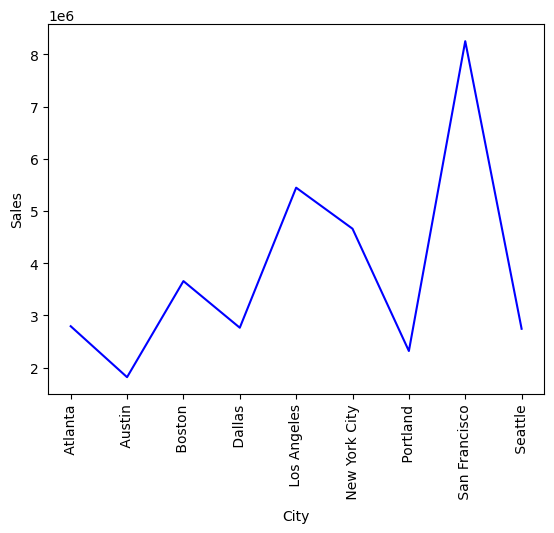

In [40]:
plt.plot(Highest_sales_city_df['City'],Highest_sales_city_df['Sales'],color='blue')
plt.xticks(rotation='vertical')
plt.xlabel('City')
plt.ylabel('Sales')
plt.show()